In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from keras.datasets import mnist

In [3]:
(X_train, y_train),(X_test, y_test) = mnist.load_data()

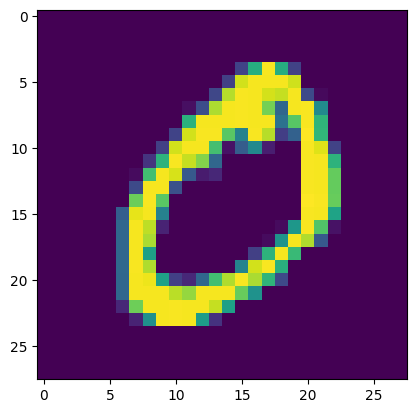

In [4]:
plt.imshow(X_train[1])

In [5]:
y_train[1]

0

In [6]:
only_zeros = X_train[y_train==0]

In [7]:
only_zeros.shape

(5923, 28, 28)

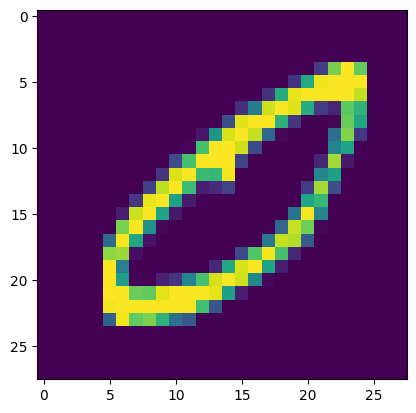

In [8]:
plt.imshow(only_zeros[101])

In [9]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Reshape,Flatten

In [10]:
np.random.seed(42)
tf.random.set_seed(42)

codings_size = 100

In [11]:
generator = Sequential()
generator.add(Dense(100, activation='relu',input_shape=[codings_size]))
generator.add(Dense(150,activation='relu'))
generator.add(Dense(784,activation='sigmoid'))
generator.add(Reshape([28,28]))

In [12]:
discriminator = Sequential()
discriminator.add(Flatten(input_shape=[28,28]))
discriminator.add(Dense(150,activation='relu'))
discriminator.add(Dense(100,activation='relu'))
discriminator.add(Dense(1,activation='sigmoid'))

discriminator.compile(loss='binary_crossentropy',optimizer='adam')

In [13]:
GAN = Sequential([generator,discriminator])

In [14]:
discriminator.trainable = False

In [15]:
GAN.compile(loss='binary_crossentropy',optimizer='adam')

In [16]:
GAN.layers

In [17]:
GAN.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 28, 28)            143634    
                                                                 
 sequential_1 (Sequential)   (None, 1)                 132951    
                                                                 
Total params: 276,585
Trainable params: 143,634
Non-trainable params: 132,951
_________________________________________________________________


In [18]:
GAN.layers[0].summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               10100     
                                                                 
 dense_1 (Dense)             (None, 150)               15150     
                                                                 
 dense_2 (Dense)             (None, 784)               118384    
                                                                 
 reshape (Reshape)           (None, 28, 28)            0         
                                                                 
Total params: 143,634
Trainable params: 143,634
Non-trainable params: 0
_________________________________________________________________


In [19]:
GAN.layers[1].summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 150)               117750    
                                                                 
 dense_4 (Dense)             (None, 100)               15100     
                                                                 
 dense_5 (Dense)             (None, 1)                 101       
                                                                 
Total params: 132,951
Trainable params: 0
Non-trainable params: 132,951
_________________________________________________________________


In [22]:
my_data = only_zeros

In [30]:
my_data

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [23]:
import tensorflow as tf

In [24]:
batch_size=32

In [26]:
dataset = tf.data.Dataset.from_tensor_slices(my_data).shuffle(buffer_size=1000)

In [31]:
type(dataset)

tensorflow.python.data.ops.dataset_ops.ShuffleDataset

In [32]:
dataset = dataset.batch(batch_size,drop_remainder=True).prefetch(1)

In [33]:
epochs = 1

## Training Loop

In [34]:
generator, discriminator = GAN.layers

for epoch in range(epochs):
    print(f"Currently on Epoch {epoch+1}")
    i=0

    for X_batch in dataset:
        i=i+1
        if i%100 == 0:
            print(f"\Currently on batch number {i} of {len(my_data)//batch_size}")

        
        noise = tf.random.normal(shape=[batch_size,codings_size])

        gen_images = generator(noise)

        X_fake_vs_real = tf.concat([gen_images,tf.dtypes.cast(X_batch,tf.float32)],axis=0)

        y1 = tf.constant([[0.]] * batch_size + [[1.]] * batch_size)

        discriminator.trainable = True

        discriminator.train_on_batch(X_fake_vs_real, y1)

        noise = tf.random.normal(shape=[batch_size, codings_size])

        y2 = tf.constant([[1.]] * batch_size)

        discriminator.trainable = False
        GAN.train_on_batch(noise,y2)

print("Training complete")


Currently on Epoch 1
\Currently on batch number 100 of 185
Training complete


In [42]:
noise = tf.random.normal(shape=[10, codings_size])

In [43]:
noise.shape

TensorShape([10, 100])

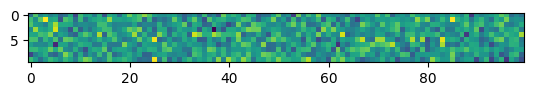

In [44]:
plt.imshow(noise)

In [45]:
image = generator(noise)

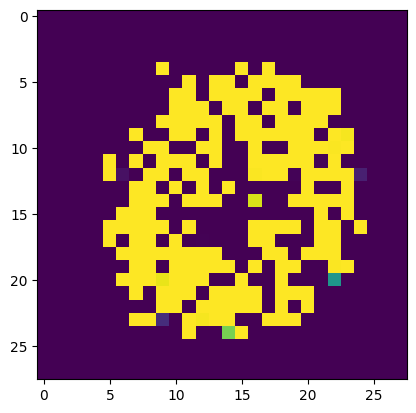

In [46]:
plt.imshow(image[1])